In [1]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import json
import time
import random
import os
import logging
from datetime import datetime
import os
import sys
import requests
import pandas as pd
import re

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_19036\1378756733.py:13: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def open_json(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        return json.load(f)
def open_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        contents = f.read()
    return BeautifulSoup(contents, 'html.parser')

In [20]:
lis = [{"a":1,"b":2},{"a":3,"b":4}]
df = pd.DataFrame(lis)
df

,a,b
0,1,2
1,3,4


In [28]:
json_list = open_json("../udemy/list/parted/list.json")
list_for_df = []
for pk in tqdm((html_files & json_files)):
    html_file = os.path.join(folder_path, f"{pk}.html")
    json_file = os.path.join(folder_path, f"{pk}.json")
    json_description = open_json(json_file)
    json_info = json_list.get(pk)
    html_soup = open_html(html_file)
    # print(json_list)
    temp = {}
    temp["id"] = pk
    if html_soup.find(class_="topic-menu topic-menu-condensed ud-breadcrumb"):
        hier = html_soup.find(class_="topic-menu topic-menu-condensed ud-breadcrumb").find_all("a")
        temp["isAccess"] = True
        if len(hier) == 3:
            temp["category"] = hier[1].text.strip()
            temp["tags"] = hier[2].text.strip()
        elif len(hier)==2:
            temp["category"] = hier[1].text.strip()
            temp["tags"] = ""
        else:
            temp["category"] = ""
            temp["tags"] = ""
    else:
        temp["isAccess"] = False
    list_for_df.append(temp)
pd.DataFrame(list_for_df).to_csv("./test.csv",index=False)

    # break

  0%|          | 0/60130 [00:00<?, ?it/s]


In [29]:
pd.read_csv("./test.csv")

,id,isAccess,category,tags
0,2059235,True,기타 IT 및 소프트웨어,Jenkins


In [26]:
hier[1].text.strip()

'기타 IT 및 소프트웨어'


<!DOCTYPE html>

<html lang="ko-kr">
<head>
<title>Oracle APEX Cloud Developer Specialist 1Z0-760 | Udemy</title>
<script nonce="KRad6pWKmuXsU5kyR1mgbmIc0irI4J38htf728hWbUY=" type="text/javascript">
        // Note: must be called before google tag manager is initialized in OptanonWrapper()
        if (typeof window.dataLayer == 'undefined') {
            window.dataLayer = window.dataLayer || [];
        }

        function callGtag() {
            window.dataLayer.push(arguments);
        }

        var GRANTED = 'granted';
        var DENIED = 'denied';

        window.optOutConsent = {
            ad_storage: GRANTED,
            analytics_storage: GRANTED,
            functionality_storage: GRANTED,
            personalization_storage: GRANTED,
            security_storage: GRANTED
        }

        window.optInConsent = {
            ad_storage: DENIED,
            analytics_storage: DENIED,
            functionality_storage: DENIED,
            personalization_storage: DENIED,
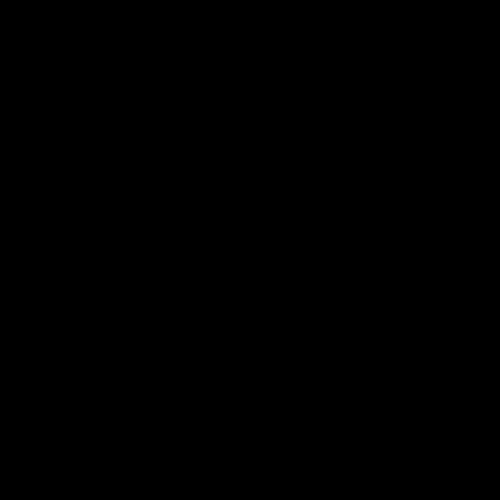
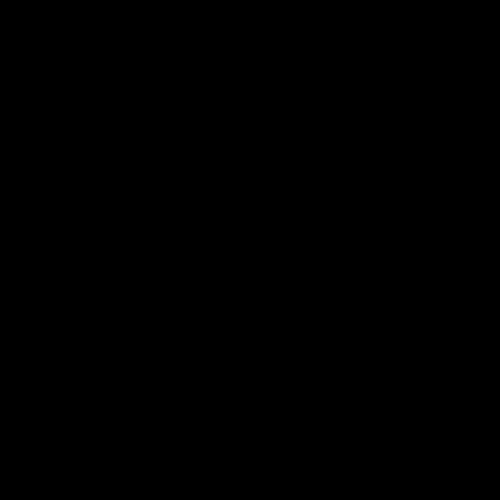

In [17]:
pk = 5266892
html_file = os.path.join(folder_path, f"{pk}.html")
json_file = os.path.join(folder_path, f"{pk}.json")
json_description = open_json(json_file)
json_info = json_list.get(pk)
html_soup = open_html(html_file)
html_soup

# inflearn

In [30]:
# 폴더 경로
folder_path = "../inflearn/page/" # 실제 폴더 경로로 변경해주세요.

html_files = {f[:-5] for f in os.listdir(folder_path) if f.endswith('.html')}
json_files = {f[:-5] for f in os.listdir(folder_path) if f.endswith('.json')}


In [ ]:
list_for_df = []
for pk in tqdm((html_files & json_files)):
    html_file = os.path.join(folder_path, f"{pk}.html")
    html_soup = open_html(html_file)

    category = html_soup.find(class_="cd-header__breadcrumb").find_all(class_="cd-header__breadcrumb-el")[-1].text.strip()
    tags = '||'.join(list(map(lambda x:x.text.strip(), html_soup.find(class_="cd-header__tags cd-header__sub-row").find_all("a"))))

    temp = {}
    temp["id"] = pk
    temp["isAccess"] = True
    temp["category"] = category
    temp["tags"] = tags
    list_for_df.append(temp)
pd.DataFrame(list_for_df).to_csv("./test.csv",index=False)

    # break

In [44]:
category = html_soup.find(class_="cd-header__breadcrumb").find_all(class_="cd-header__breadcrumb-el")[-1].text.strip()
tags = '||'.join(list(map(lambda x:x.text.strip(), html_soup.find(class_="cd-header__tags cd-header__sub-row").find_all("a"))))
tags

'stress-testing||artillery'

# inflearn tags

In [29]:
df = pd.read_csv("./inflearn_categories_tags.csv")
df

,id,isAccess,category,tags
0,326197,True,VR/AR,VR/AR||Unity
1,327054,True,VR/AR,메타버스||VR/AR||협업 툴
2,326527,True,VR/AR,iOS||SwiftUI||VR/AR
3,169883,True,VR/AR,Unity||VR/AR
4,326148,True,보안,Linux||시스템 해킹||모의해킹
...,...,...,...,...
1962,324542,True,데이터 수집 · 처리,Python||웹 크롤링
1963,328642,True,데이터 수집 · 처리,Python||웹 크롤링
1964,326350,True,데이터 수집 · 처리,Python||웹 크롤링
1965,121703,True,데이터 수집 · 처리,Python||웹 크롤링


파이썬 웹 크롤링
파이썬웹크롤링
파이썬 웹크롤링

In [47]:
import math
data_list = []
t=None
for _, row in df.iterrows():
    if not isinstance(row["tags"],str):
        data["id"] = row["id"]
        data["category"] = row["category"]
        data["tags"] = ""
        data_list.append(data)
        continue
    for tag in row["tags"].split("||"):
        data = {}
        data["id"] = row["id"]
        data["category"] = row["category"]
        data["tags"] = tag
        data_list.append(data)
    
df_category_tags = pd.DataFrame(data_list)

In [49]:
df_category_tags.to_csv("./inflearn_category_tags_expand.csv",index=False)

# tags unique

logic : 소문자,strip,공백제거 -> 

In [23]:
def preprocess(tags):
    return list(map(lambda x:{
                    "original" : x,
                    "preprocessed": x.strip().lower().replace(" ",""),
                    "whitespace" : x.strip().count(" ")
                }, tags))

In [21]:
inflearn_tags = pd.read_csv("./inflearn_category_tags_expand.csv")
inflearn_tags = inflearn_tags["tags"].unique()[:-1]
inflearn_tags = preprocess(inflearn_tags)
inflearn_tags[:3]

[{'original': 'VR/AR', 'preprocessed': 'vr/ar', 'whitespace': 0},
 {'original': 'Unity', 'preprocessed': 'unity', 'whitespace': 0},
 {'original': '메타버스', 'preprocessed': '메타버스', 'whitespace': 0}]

In [22]:
udemy_tags = pd.read_csv("./udemy_unique_tags.csv")
udemy_tags = udemy_tags["tags"].unique()
udemy_tags = preprocess(udemy_tags)
udemy_tags[:3]

[{'original': 'OpenCV', 'preprocessed': 'opencv', 'whitespace': 0},
 {'original': 'Dynatrace', 'preprocessed': 'dynatrace', 'whitespace': 0},
 {'original': '공급망', 'preprocessed': '공급망', 'whitespace': 0}]

In [46]:
goorm_categories_tags = pd.read_csv("./goorm_categories_tag.csv")
goorm_categories_tags

,id,category,tags
0,10107,game development,유니티
1,10671,block programming,스크래치||인공지능
2,10672,block programming,엔트리
3,10673,block programming,수학||엔트리
4,10681,block programming,NaN
...,...,...,...
448,5999,block programming,NaN
449,6198,block programming,NaN
450,790,programming general,NaN
451,970,algorithm,알고리즘


In [47]:
import math
data_list = []
for _, row in goorm_categories_tags.iterrows():
    if not isinstance(row["tags"],str):
        data["id"] = row["id"]
        data["category"] = row["category"]
        data["tags"] = ""
        data_list.append(data)
        continue
    for tag in row["tags"].split("||"):
        data = {}
        data["id"] = row["id"]
        data["category"] = row["category"]
        data["tags"] = tag
        data_list.append(data)
    
df_category_tags = pd.DataFrame(data_list)
df_category_tags

,id,category,tags
0,10107,game development,유니티
1,10671,block programming,스크래치
2,10671,block programming,인공지능
3,10672,block programming,엔트리
4,10673,block programming,수학
...,...,...,...
865,790,programming general,
866,790,programming general,
867,790,programming general,
868,970,algorithm,알고리즘


In [52]:
goorm_tags = df_category_tags["tags"].unique()
goorm_tags = preprocess(goorm_tags)
len(goorm_tags)

62

In [55]:
preprocessed2servicetag = {}
for tag in inflearn_tags:
  # 겹치는게 이미 있다면 공백이 더 많은 original을 가져간다.
  if tag["preprocessed"] in preprocessed2servicetag:
      if preprocessed2servicetag.get(tag["preprocessed"]).count(" ") < tag["whitespace"]:
         preprocessed2servicetag[tag["preprocessed"]] = tag["original"]
  else:
      preprocessed2servicetag[tag["preprocessed"]] = tag["original"]

for tag in udemy_tags:
  # 겹치는게 이미 있다면 공백이 더 많은 original을 가져간다.
  if tag["preprocessed"] in preprocessed2servicetag:
      if preprocessed2servicetag.get(tag["preprocessed"]).count(" ") < tag["whitespace"]:
         preprocessed2servicetag[tag["preprocessed"]] = tag["original"]
  else:
      preprocessed2servicetag[tag["preprocessed"]] = tag["original"]

for tag in goorm_tags:
  # 겹치는게 이미 있다면 공백이 더 많은 original을 가져간다.
  if tag["preprocessed"] in preprocessed2servicetag:
      if preprocessed2servicetag.get(tag["preprocessed"]).count(" ") < tag["whitespace"]:
         preprocessed2servicetag[tag["preprocessed"]] = tag["original"]
  else:
      preprocessed2servicetag[tag["preprocessed"]] = tag["original"]


len(preprocessed2servicetag)

3023

In [57]:
with open('./preprocessed2servicetag.json', 'w', encoding="utf-8") as file:
    json.dump(preprocessed2servicetag, file, ensure_ascii=False)


In [16]:
with open('./preprocessed2servicetag.json', 'r', encoding="utf-8") as file:
    preprocessed2servicetag = json.load(file)
preprocessed2servicetag

{'vr/ar': 'VR/AR',
 'unity': 'Unity',
 '메타버스': '메타버스',
 '협업툴': '협업 툴',
 'ios': 'iOS',
 'swiftui': 'SwiftUI',
 'linux': 'Linux',
 '시스템해킹': '시스템 해킹',
 '모의해킹': '모의 해킹',
 '악성코드': '악성코드',
 'aws': 'AWS',
 'iam': 'iam',
 '인젝션': '인젝션',
 'forensic': 'Forensic',
 'microsoftwindows': 'Microsoft Windows',
 'cheatengine': 'Cheat Engine',
 '웹셸': '웹셸',
 'bootstrap': 'Bootstrap',
 'android': 'Android',
 '암호학': '암호학',
 '리버싱': '리버싱',
 'security': 'security',
 'ossec': 'ossec',
 'wazuh': 'wazuh',
 'wireshark': 'Wireshark',
 'powershell': 'Powershell',
 '네트워크': '네트워크',
 '이력서': '이력서',
 '면접': '면접',
 'oauth': 'OAuth',
 'webgoat': 'WebGoat',
 'metasploit': 'Metasploit',
 'python': 'Python',
 'terraform': 'Terraform',
 'devsecops': 'devsecops',
 'pycryptodome': 'pycryptodome',
 'owasp': 'owasp',
 'isms-p': 'ISMS-P',
 'privacy': 'privacy',
 'sql': 'SQL',
 'mysql': 'MySQL',
 'criminalip': 'Criminal IP',
 '하드웨어해킹': '하드웨어 해킹',
 'buffer-overflow': 'buffer-overflow',
 'esxi': 'ESXi',
 'vspherehypervisor': 'vSphere H

In [17]:
def tag2svc(tag):
    processed_tag = {"original" : tag,
                    "preprocessed": tag.strip().lower().replace(" ",""),
                    "whitespace" : tag.strip().count(" ")
    }
    return preprocessed2servicetag.get(processed_tag["preprocessed"])

In [65]:
df_category_tags["tags"].apply(lambda x:tag2svc(x))

0        유니티
1       스크래치
2      인공 지능
3        엔트리
4         수학
       ...  
865         
866         
867         
868     알고리즘
869      유니티
Name: tags, Length: 870, dtype: object

In [56]:
preprocessed2servicetag

{'vr/ar': 'VR/AR',
 'unity': 'Unity',
 '메타버스': '메타버스',
 '협업툴': '협업 툴',
 'ios': 'iOS',
 'swiftui': 'SwiftUI',
 'linux': 'Linux',
 '시스템해킹': '시스템 해킹',
 '모의해킹': '모의 해킹',
 '악성코드': '악성코드',
 'aws': 'AWS',
 'iam': 'iam',
 '인젝션': '인젝션',
 'forensic': 'Forensic',
 'microsoftwindows': 'Microsoft Windows',
 'cheatengine': 'Cheat Engine',
 '웹셸': '웹셸',
 'bootstrap': 'Bootstrap',
 'android': 'Android',
 '암호학': '암호학',
 '리버싱': '리버싱',
 'security': 'security',
 'ossec': 'ossec',
 'wazuh': 'wazuh',
 'wireshark': 'Wireshark',
 'powershell': 'Powershell',
 '네트워크': '네트워크',
 '이력서': '이력서',
 '면접': '면접',
 'oauth': 'OAuth',
 'webgoat': 'WebGoat',
 'metasploit': 'Metasploit',
 'python': 'Python',
 'terraform': 'Terraform',
 'devsecops': 'devsecops',
 'pycryptodome': 'pycryptodome',
 'owasp': 'owasp',
 'isms-p': 'ISMS-P',
 'privacy': 'privacy',
 'sql': 'SQL',
 'mysql': 'MySQL',
 'criminalip': 'Criminal IP',
 '하드웨어해킹': '하드웨어 해킹',
 'buffer-overflow': 'buffer-overflow',
 'esxi': 'ESXi',
 'vspherehypervisor': 'vSphere H

In [62]:
def new_lecture(tag):
    processed_tag = {"original" : tag,
                    "preprocessed": tag.strip().lower().replace(" ",""),
                    "whitespace" : tag.strip().count(" ")
    }
    return preprocessed2servicetag.get(processed_tag["preprocessed"])

'C++'

# category to from

In [24]:
inflearn_categories = pd.read_csv("./inflearn_categories_tags.csv")
inflearn_categories

,id,isAccess,category,tags
0,326197,True,VR/AR,VR/AR||Unity
1,327054,True,VR/AR,메타버스||VR/AR||협업 툴
2,326527,True,VR/AR,iOS||SwiftUI||VR/AR
3,169883,True,VR/AR,Unity||VR/AR
4,326148,True,보안,Linux||시스템 해킹||모의해킹
...,...,...,...,...
1962,324542,True,데이터 수집 · 처리,Python||웹 크롤링
1963,328642,True,데이터 수집 · 처리,Python||웹 크롤링
1964,326350,True,데이터 수집 · 처리,Python||웹 크롤링
1965,121703,True,데이터 수집 · 처리,Python||웹 크롤링


In [3]:
udemy_categories = pd.read_csv("./udemy_category_tags.csv")
udemy_categories

,id,isAccess,category,tags
0,5467400,True,IT 인증,Professional Scrum Master(PSM)
1,1294046,True,모바일 개발,Android 개발
2,3620656,True,웹 개발,JavaScript
3,3825092,True,노코드 개발,WordPress
4,3843498,True,IT 인증,Tableau
...,...,...,...,...
60125,4693788,True,네트워크 및 보안,PowerShell
60126,352378,True,기타 IT 및 소프트웨어,Python
60127,5510828,True,기타 IT 및 소프트웨어,JavaScript
60128,3381284,True,네트워크 및 보안,사이버 보안


In [39]:
goorm_categories = pd.read_csv("./goorm_categories_tag.csv")
goorm_categories

,id,category,tags
0,10107,game development,유니티
1,10671,block programming,스크래치||인공지능
2,10672,block programming,엔트리
3,10673,block programming,수학||엔트리
4,10681,block programming,NaN
...,...,...,...
448,5999,block programming,NaN
449,6198,block programming,NaN
450,790,programming general,NaN
451,970,algorithm,알고리즘


In [73]:
# ["웹 개발", "모바일 개발", "게임 개발", "프로그래밍 언어",
# "데이터 과학", "데이터베이스", "알고리즘", "보안/네트워크", "데브옵스/인프라",
#  "자격증","개발도구/테스팅","하드웨어/IoT","기타"]
cat2svc = {}
cat2svc["VR/AR"] = "기타"
cat2svc["보안"] = "보안/네트워크"
cat2svc["반도체"] = "하드웨어/IoT"
cat2svc["백엔드"] = "웹 개발"
cat2svc["시스템"] = "보안/네트워크"
cat2svc["풀스택"] = "웹 개발"
cat2svc["웹 개발"] = "웹 개발"
cat2svc["네트워크"] = "보안/네트워크"
cat2svc["모빌리티"] = "하드웨어/IoT"
cat2svc["블록체인"] = "보안/네트워크"
cat2svc["인공지능"] = "데이터 과학"
cat2svc["클라우드"] = "보안/네트워크"
cat2svc["개발 도구"] = "개발도구/테스팅"
cat2svc["게임 기획"] = "게임 개발"
cat2svc["프론트엔드"] = "웹 개발"
cat2svc["데이터 분석"] = "데이터 과학"
cat2svc["웹 퍼블리싱"] = "웹 개발"
cat2svc["컴퓨터 구조"] = "하드웨어/IoT"
cat2svc["데이터베이스"] = "데이터베이스"
cat2svc["데이터 시각화"] = "데이터 과학"
cat2svc["임베디드 · IoT"] = "하드웨어/IoT"
cat2svc["모바일 앱 개발"] = "모바일 개발"
cat2svc["기타 (하드웨어)"] = "하드웨어/IoT"
cat2svc["게임 프로그래밍"] = "게임 개발"
cat2svc["기타 (게임 개발)"] = "게임 개발"
cat2svc["프로그래밍 언어"] = "프로그래밍 언어"
cat2svc["데스크톱 앱 개발"] = "기타"
cat2svc["데브옵스 · 인프라"] = "데브옵스/인프라"
cat2svc["게임 아트 · 그래픽"] = "게임 개발"
cat2svc["데이터 수집 · 처리"] = "데이터 과학"
cat2svc["알고리즘 · 자료구조"] = "알고리즘"
cat2svc["기타 (데이터 사이언스)"] = "데이터 과학"
cat2svc["기타 (보안 · 네트워크)"] = "보안/네트워크"
cat2svc["기타 (개발 · 프로그래밍)"] = "기타"
cat2svc["자격증 (데이터 사이언스)"] = "자격증"
cat2svc["자격증 (보안 · 네트워크)"] = "자격증"
cat2svc["자격증 (개발 · 프로그래밍)"] = "자격증"


In [27]:
inflearn_categories["category"].unique()

array(['VR/AR', '보안', '반도체', '백엔드', '시스템', '풀스택', '웹 개발', '네트워크', '모빌리티',
       '블록체인', '인공지능', '클라우드', '개발 도구', '게임 기획', '프론트엔드', '데이터 분석',
       '웹 퍼블리싱', '컴퓨터 구조', '데이터베이스', '데이터 시각화', '임베디드 · IoT', '모바일 앱 개발',
       '기타 (하드웨어)', '게임 프로그래밍', '기타 (게임 개발)', '프로그래밍 언어', '데스크톱 앱 개발',
       '데브옵스 · 인프라', '게임 아트 · 그래픽', '데이터 수집 · 처리', '알고리즘 · 자료구조',
       '기타 (데이터 사이언스)', '기타 (보안 · 네트워크)', '기타 (개발 · 프로그래밍)',
       '자격증 (데이터 사이언스)', '자격증 (보안 · 네트워크)', '자격증 (개발 · 프로그래밍)'],
      dtype=object)

In [35]:
udemy_categories["category"].unique()[:-1]

array(['IT 인증', '모바일 개발', '웹 개발', '노코드 개발', '데이터베이스 설계 및 개발',
       '기타 IT 및 소프트웨어', '프로그래밍 언어', '네트워크 및 보안', '데이터 과학', '운영 체제 및 서버',
       '하드웨어', '소프트웨어 개발 도구', '게임 개발', '소프트웨어 엔지니어링', '소프트웨어 테스팅'],
      dtype=object)

In [74]:
# ["웹 개발", "모바일 개발", "게임 개발", "프로그래밍 언어",
# "데이터 과학", "데이터베이스", "알고리즘", "보안/네트워크", "데브옵스/인프라",
#  "자격증","개발도구/테스팅","하드웨어/IoT","기타"]
cat2svc["IT 인증"] = "자격증"
cat2svc["모바일 개발"] = "모바일 개발"
cat2svc["웹 개발"] = "웹 개발"
cat2svc["노코드 개발"] = "기타"
cat2svc["데이터베이스 설계 및 개발"] = "데이터베이스"
cat2svc["기타 IT 및 소프트웨어"] = "기타"
cat2svc["프로그래밍 언어"] = "프로그래밍 언어"
cat2svc["네트워크 및 보안"] =  "보안/네트워크"
cat2svc["데이터 과학"] = "데이터 과학"
cat2svc["운영 체제 및 서버"] = "기타"
cat2svc["하드웨어"] = "하드웨어/IoT"
cat2svc["소프트웨어 개발 도구"] = "개발도구/테스팅"
cat2svc["게임 개발"] = "게임 개발"
cat2svc["소프트웨어 엔지니어링"] = "기타"
cat2svc["소프트웨어 테스팅"] = "개발도구/테스팅"


In [40]:
goorm_categories["category"].unique()

array(['game development', 'block programming', 'programming general',
       'algorithm', 'programming fundamentals', 'databases',
       'web programming', 'artificial intelligence', 'security',
       'development tools', 'data extraction analysis',
       'mobile programming', 'math', 'devops', 'other', 'iot'],
      dtype=object)

In [75]:
# ["웹 개발", "모바일 개발", "게임 개발", "프로그래밍 언어",
# "데이터 과학", "데이터베이스", "알고리즘", "보안/네트워크", "데브옵스/인프라",
#  "자격증","개발도구/테스팅","하드웨어/IoT","기타"]
cat2svc["game development"] = "게임 개발"
cat2svc["block programming"] = "기타"
cat2svc["programming general"] = "기타"
cat2svc["algorithm"] = "알고리즘"
cat2svc["programming fundamentals"] = "프로그래밍 언어"
cat2svc["databases"] = "데이터베이스"
cat2svc["web programming"] = "웹 개발"
cat2svc["artificial intelligence"] = "데이터 과학"
cat2svc["security"] = "보안/네트워크"
cat2svc["development tools"] = "개발도구/테스팅"
cat2svc["data extraction analysis"] = "데이터 과학"
cat2svc["mobile programming"] = "모바일 개발"
cat2svc["math"] = "기타"
cat2svc["devops"] = "데브옵스/인프라"
cat2svc["other"] = "기타"
cat2svc["iot"] = "하드웨어/IoT"


In [76]:
with open('./cat2svc.json', 'w', encoding="utf-8") as file:
    json.dump(cat2svc, file, ensure_ascii=False)


# convert to csv

In [8]:
with open('./cat2svc.json', 'r', encoding="utf-8") as f:
    cat2svc = json.load(f)
cat2svc

{'VR/AR': '기타',
 '보안': '보안/네트워크',
 '반도체': '하드웨어/IoT',
 '백엔드': '웹 개발',
 '시스템': '보안/네트워크',
 '풀스택': '웹 개발',
 '웹 개발': '웹 개발',
 '네트워크': '보안/네트워크',
 '모빌리티': '하드웨어/IoT',
 '블록체인': '보안/네트워크',
 '인공지능': '데이터 과학',
 '클라우드': '보안/네트워크',
 '개발 도구': '개발도구/테스팅',
 '게임 기획': '게임 개발',
 '프론트엔드': '웹 개발',
 '데이터 분석': '데이터 과학',
 '웹 퍼블리싱': '웹 개발',
 '컴퓨터 구조': '하드웨어/IoT',
 '데이터베이스': '데이터베이스',
 '데이터 시각화': '데이터 과학',
 '임베디드 · IoT': '하드웨어/IoT',
 '모바일 앱 개발': '모바일 개발',
 '기타 (하드웨어)': '하드웨어/IoT',
 '게임 프로그래밍': '게임 개발',
 '기타 (게임 개발)': '게임 개발',
 '프로그래밍 언어': '프로그래밍 언어',
 '데스크톱 앱 개발': '기타',
 '데브옵스 · 인프라': '데브옵스/인프라',
 '게임 아트 · 그래픽': '게임 개발',
 '데이터 수집 · 처리': '데이터 과학',
 '알고리즘 · 자료구조': '알고리즘',
 '기타 (데이터 사이언스)': '데이터 과학',
 '기타 (보안 · 네트워크)': '보안/네트워크',
 '기타 (개발 · 프로그래밍)': '기타',
 '자격증 (데이터 사이언스)': '자격증',
 '자격증 (보안 · 네트워크)': '자격증',
 '자격증 (개발 · 프로그래밍)': '자격증',
 'IT 인증': '자격증',
 '모바일 개발': '모바일 개발',
 '노코드 개발': '기타',
 '데이터베이스 설계 및 개발': '데이터베이스',
 '기타 IT 및 소프트웨어': '기타',
 '네트워크 및 보안': '보안/네트워크',
 '데이터 과학': '데이터 과학',
 '운영 체제 및 서버': '기타',
 '하드

In [79]:
svc_category_df = pd.DataFrame(list(set(cat2svc.values())),columns=["category_name"])

In [87]:
svc_tag_df = pd.DataFrame(preprocessed2servicetag.values(), columns=["name"])
svc_tag_df.to_csv("../data-dump/data/tag.csv",index=False)


# udemy svc용 데이터로 변환

In [9]:
cat2svc

{'VR/AR': '기타',
 '보안': '보안/네트워크',
 '반도체': '하드웨어/IoT',
 '백엔드': '웹 개발',
 '시스템': '보안/네트워크',
 '풀스택': '웹 개발',
 '웹 개발': '웹 개발',
 '네트워크': '보안/네트워크',
 '모빌리티': '하드웨어/IoT',
 '블록체인': '보안/네트워크',
 '인공지능': '데이터 과학',
 '클라우드': '보안/네트워크',
 '개발 도구': '개발도구/테스팅',
 '게임 기획': '게임 개발',
 '프론트엔드': '웹 개발',
 '데이터 분석': '데이터 과학',
 '웹 퍼블리싱': '웹 개발',
 '컴퓨터 구조': '하드웨어/IoT',
 '데이터베이스': '데이터베이스',
 '데이터 시각화': '데이터 과학',
 '임베디드 · IoT': '하드웨어/IoT',
 '모바일 앱 개발': '모바일 개발',
 '기타 (하드웨어)': '하드웨어/IoT',
 '게임 프로그래밍': '게임 개발',
 '기타 (게임 개발)': '게임 개발',
 '프로그래밍 언어': '프로그래밍 언어',
 '데스크톱 앱 개발': '기타',
 '데브옵스 · 인프라': '데브옵스/인프라',
 '게임 아트 · 그래픽': '게임 개발',
 '데이터 수집 · 처리': '데이터 과학',
 '알고리즘 · 자료구조': '알고리즘',
 '기타 (데이터 사이언스)': '데이터 과학',
 '기타 (보안 · 네트워크)': '보안/네트워크',
 '기타 (개발 · 프로그래밍)': '기타',
 '자격증 (데이터 사이언스)': '자격증',
 '자격증 (보안 · 네트워크)': '자격증',
 '자격증 (개발 · 프로그래밍)': '자격증',
 'IT 인증': '자격증',
 '모바일 개발': '모바일 개발',
 '노코드 개발': '기타',
 '데이터베이스 설계 및 개발': '데이터베이스',
 '기타 IT 및 소프트웨어': '기타',
 '네트워크 및 보안': '보안/네트워크',
 '데이터 과학': '데이터 과학',
 '운영 체제 및 서버': '기타',
 '하드

In [10]:
udemy_categories = pd.read_csv("./udemy_category_tags.csv")
udemy_categories = udemy_categories[udemy_categories["isAccess"]==True]

In [12]:
udemy_categories["category"] = udemy_categories["category"].apply(lambda x:cat2svc.get(x))

In [26]:
udemy_categories["tags"] = udemy_categories["tags"].apply(lambda x:tag2svc(x))
udemy_categories.to_csv("../data-dump/udemy_lecture_cat_tags.csv",
                        index=False)